## 1. Introduction

Name : **Yugal Chambhare**

My Github : [Click on my Github](https://github.com/yugal18)

Project : **Credit Card Fraud Detection(Imbalanced Dataset)**

Goal : **1) Supervised(Classification) Machine Learning Task**

**2) We want to avoid false negative as much as possible and we are going to do that using RECALL metric.**

#### 1.1 Dataset Overview

The dataset contains **284,807** transactions.

It is highly **imbalanced**, meaning the number of fraudulent transactions (Class = 1) is significantly **lower** than the number of non-fraudulent ones (Class = 0).

The dataset is useful for fraud detection models that classify transactions as either fraudulent (1) or non-fraudulent (0).


**Columns Explanation**

Time: The time elapsed (in seconds) since the first transaction in the dataset.

V1 to V28: **These are anonymized features obtained via Principal Component Analysis (PCA) for privacy reasons**. They contain numerical values that represent transformed transaction details.

Amount: The transaction amount in currency units.

Class: The target variable:
      0 → Legitimate transaction
      1 → Fraudulent transaction


**Key Points**

The features V1 to V28 are not directly interpretable due to PCA transformation.
The dataset is imbalanced, meaning special techniques like SMOTE (Synthetic Minority Over-sampling Technique), undersampling, or cost-sensitive learning may be required for model training.


**Possible Use Cases**

Fraud detection models for real-world credit card transactions.
Anomaly detection for financial security.
Model evaluation techniques for imbalanced data (Precision, Recall, F1-score, AUC-ROC).

## 2. Lets Begin

#### 2.1 Import Vital Libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score


#### 2.2 Load dataset

In [21]:
try:
  df = pd.read_csv('/content/creditcard.csv')

except:
  raise Exception('File not Found')

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2.3 Information about the dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### 2.4 Missing values

In [24]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#### 2.5 Missing Values & Handling

In [25]:
df.duplicated().sum()

1081

## 3. EDA

#### 3.1 Chart 1(Class Imbalance)

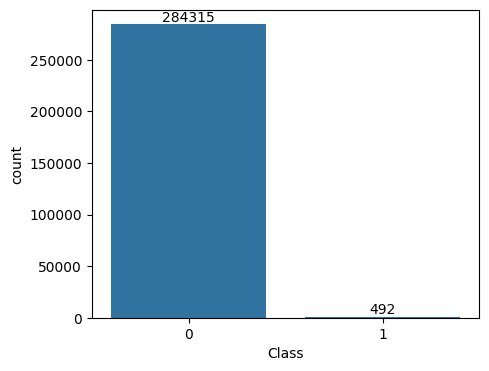

In [26]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Class',data=df)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [27]:
print(f"Honesty {round(df['Class'].value_counts()[0]/len(df) * 100,2)}% of the dataset")
print(f"Fraud {round(df['Class'].value_counts()[1]/len(df) * 100,2)}% of the dataset")

Honesty 99.83% of the dataset
Fraud 0.17% of the dataset


As we can see the class is extreamly imbalanced. where the Honest transation is 99.83% and the frauduant data is around 0.17%.

This is common in the domains like finance where you have to predict fraud/not fraud data, Healthcare sector etc. And make sure do not use accuracy as a evaluation metrics.

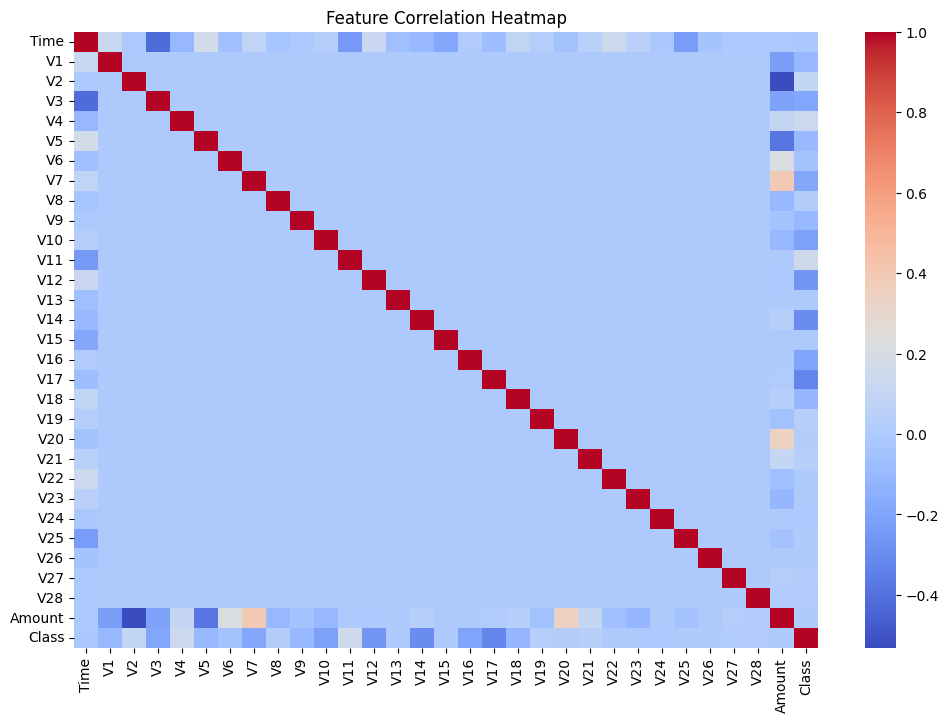

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


PCA features (V1 to V28) have low interpretability but are useful for fraud detection.

## 4. Data pre-processing

The original dataset is went througha PCA transformation except Time and Amount columns.

For PCA features need to be previously scaled so we can assume that they are (except for 'time' and 'Amount').



#### 4.1  Dropping duplicated values

In [29]:
data = df.copy()

if data.duplicated().sum()>0:
  data.drop_duplicates(inplace = True)
  print(f'Removed all Duplicates')
else:
  print('No Duplicates')

Removed all Duplicates


In [30]:
#Time feature bring nothing to this dataset so we drop it.
data = data.drop('Time', axis = 1)

#### 4.2 Why we shouldn't delete outliers? while handling fraud data?

In a credit card fraud detection dataset, outliers could represent fraudulent transactions. Removing them would mean deleting valuable information that helps detect fraud.

Some customers genuinely make large transactions that appear as outliers but are not fraudulent.

In [31]:
num_features = (list(data.iloc[:, :-1]))

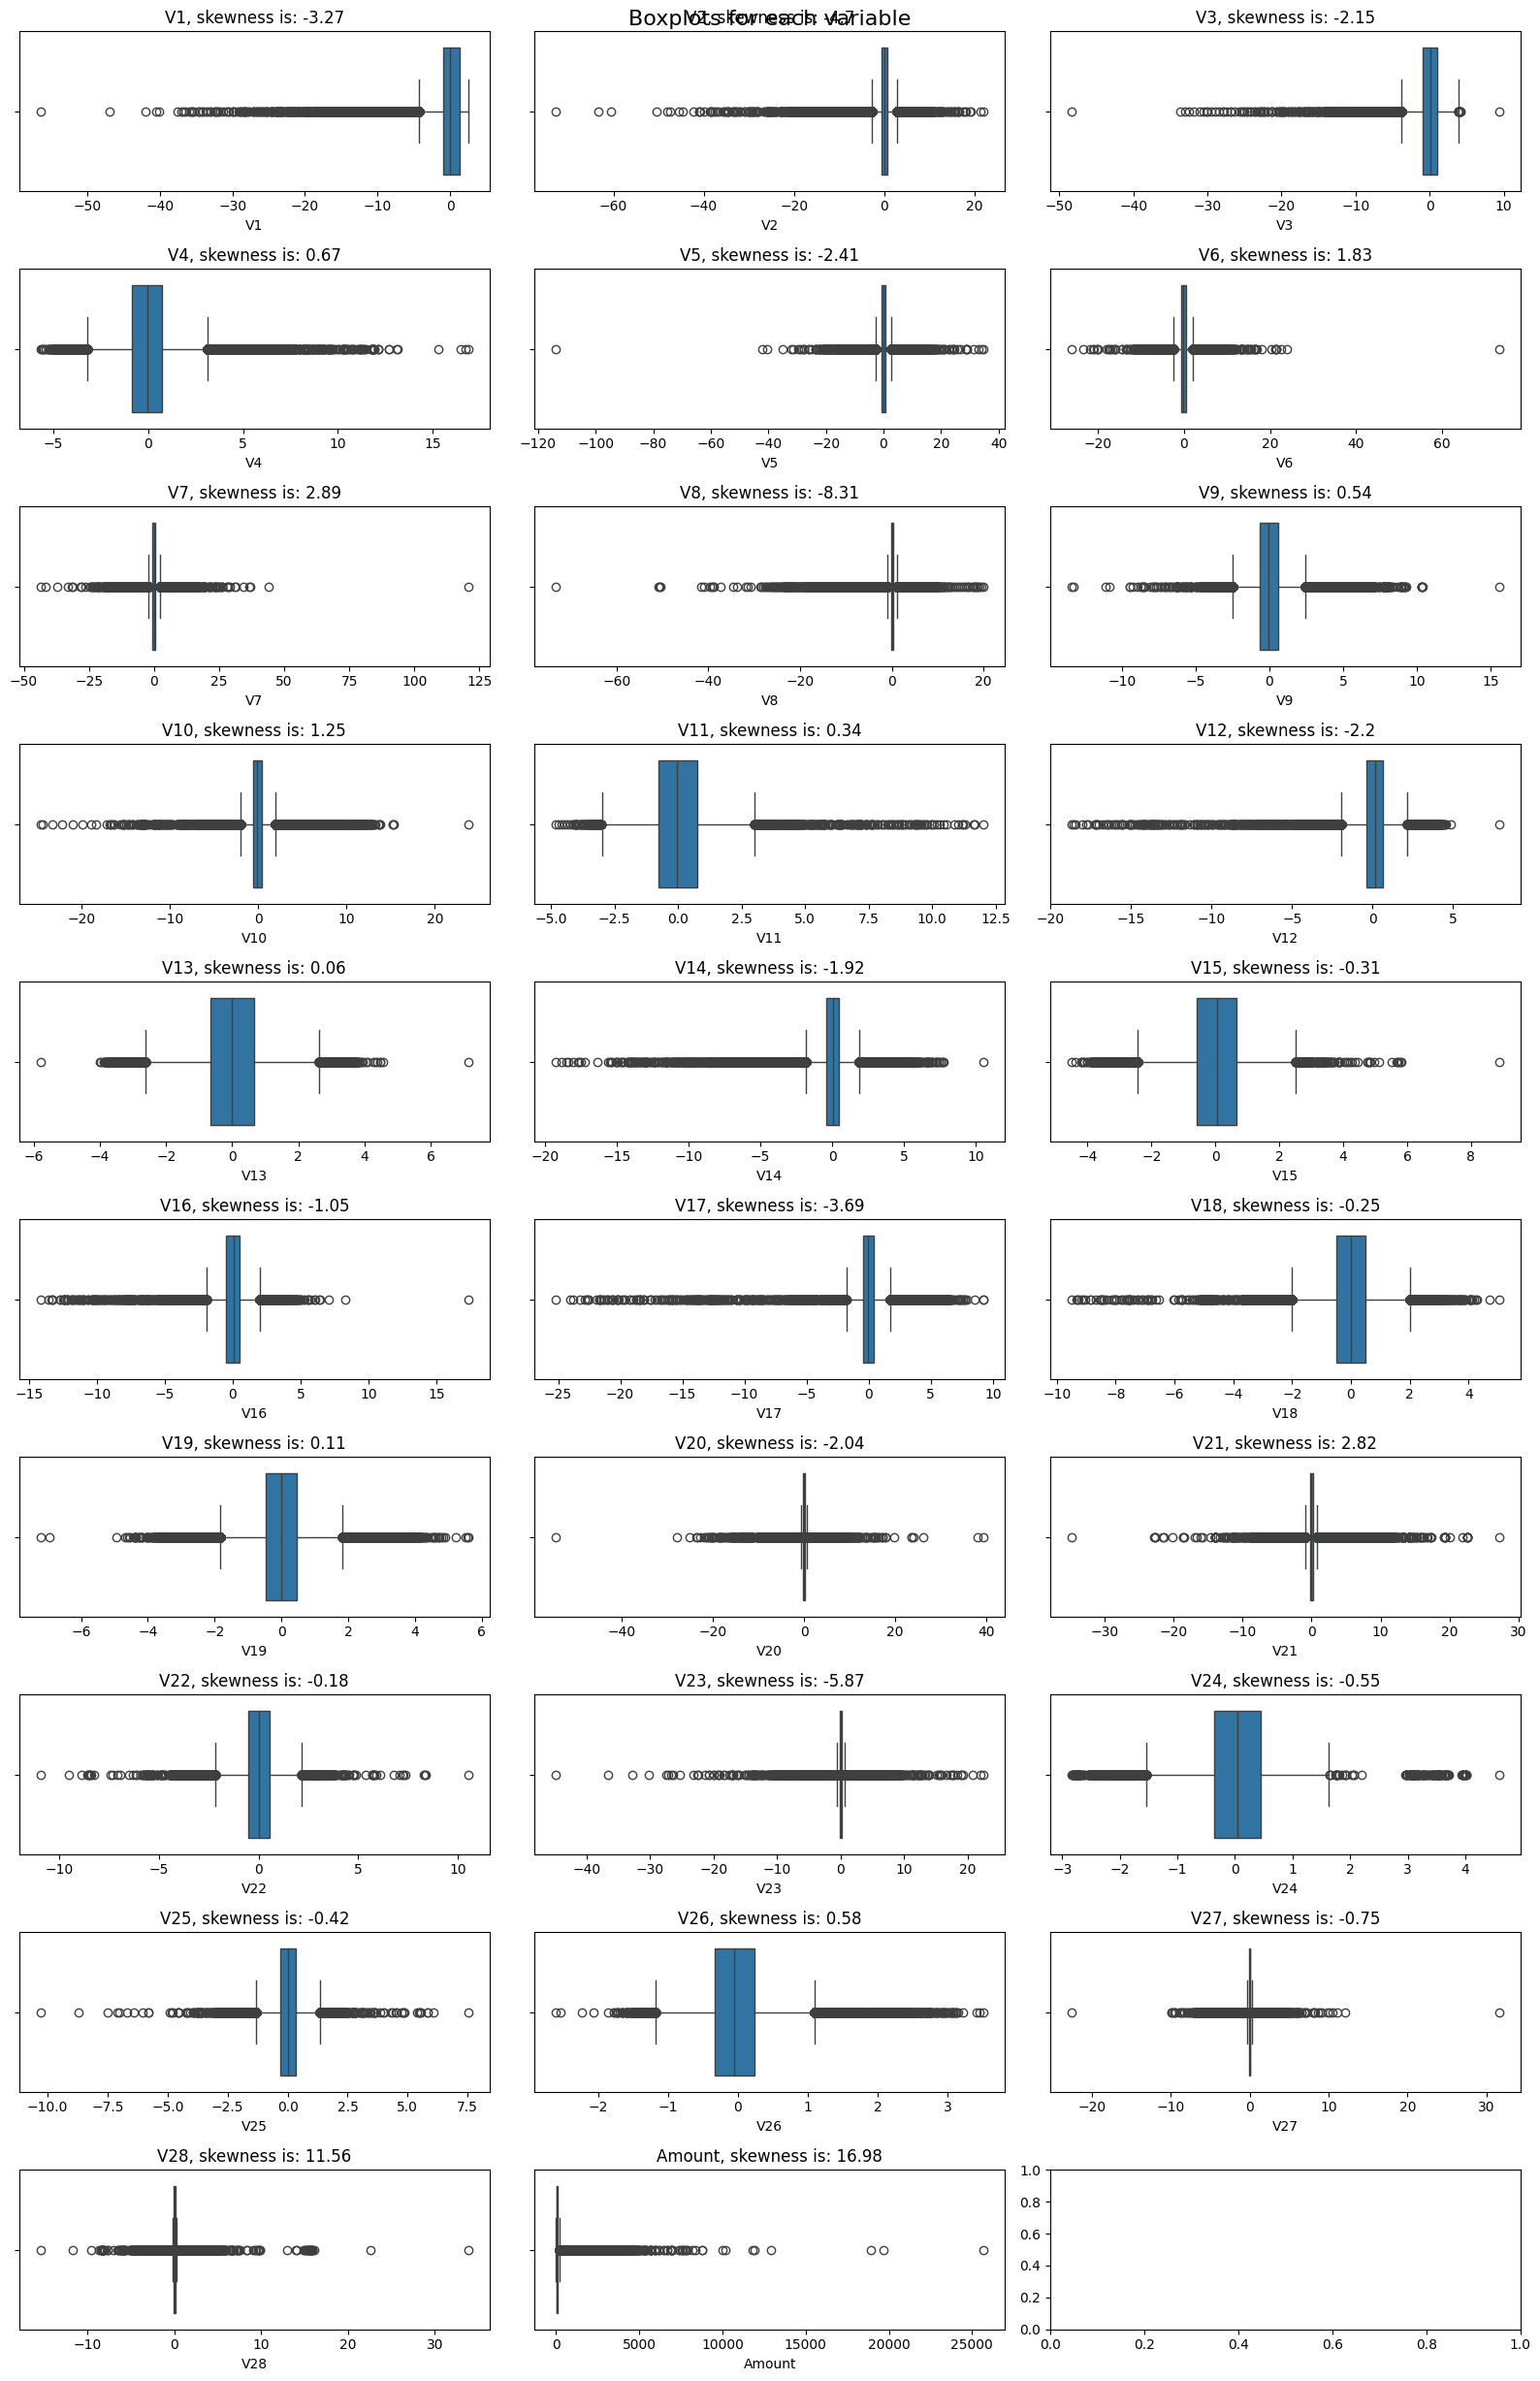

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def custom_boxplots(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16, 25))

    # Ensure axs is always iterable
    if rows * cols == 1:
        axs = [axs]
    else:
        axs = axs.flatten()

    for i, col in enumerate(columns_list):
        sns.boxplot(data=dataset, x=col, orient='h', ax=axs[i])  # Ensure dataset is a DataFrame
        axs[i].set_title(col + ', skewness is: ' + str(round(dataset[col].skew(), 2)))  # Fixed

    fig.suptitle(suptitle, fontsize=16)
    plt.tight_layout()

custom_boxplots(dataset=data, columns_list=num_features, rows=10, cols=3, suptitle='Boxplots for each variable')


## 5. Train test split - you could have been splitting your dataset all wrong

Stratified Splitting in Machine Learning
Stratified splitting is used when you want to ensure that each class (or category) in the target variable is proportionally represented in both the training and testing datasets.

This is particularly useful when dealing with imbalanced datasets, such as fraud detection (credit card fraud) or medical diagnoses.

#### 5.1 Stratified Splitting

In [33]:
X = data.drop('Class', axis=1)
y = data['Class']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)
X_train = pd.DataFrame(X_train, columns=X.columns)  # Convert X_train to DataFrame
X_test = pd.DataFrame(X_test, columns=X.columns)  # Convert X_test to DataFrame

## 6. Feature scaling

In [71]:
def Standard_Scaler(df_, col_names):
    df_ = df_.copy()  # Avoid modifying the original DataFrame

    # Ensure col_names is a list
    if not isinstance(col_names, list):
        col_names = [col_names]  # Convert single string to list

    # Extract feature columns
    features = df_[col_names].values  # Get array representation

    # Initialize and fit StandardScaler
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)

    # Convert scaled features back to DataFrame
    df_[col_names] = scaled_features

    return df_, scaler

In [73]:
col_name = ['Amount']
X_train, scaler = Standard_Scaler(X_train, col_name)
X_test, _ = Standard_Scaler(X_test, col_name)

In [74]:
print(type(X_train))  # Should be <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


## 7. Importance of Cross Validation

#### 7.1 Cross Validation

The robust model is not the one who give best performance of training data, but the one who give the best performance on unseen data that avoids overfitting and underfitting problems.

The cross validation is a resampling procedure used to evaluate mcahine learning model on limited subsample of dataset. cross validation procedure has only one parameter called k, which refer to the number of groups on subsamples of the original data.

#### 7.2 Stratified K-Fold Cross Validation


Stratified K-Fold CV is used when the datasets contain imbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

rf = RandomForestClassifier(n_estimators=100, random_state=13)


#### 7.3 Evaluation Metrics? Recall? Precision?

The model's ability to find all the relevant cases within a dataset. The number of true positives divided by the number of true positives plus the number of false negatives.

In most high-risk detection cases (like cancer, healthcare), recall is a more important evaluation metric than precision.



In our credit card fraud detection. we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed to genuine transaction, which is detrimental. In this use case, false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud.

Why not Precision? : Precision might be useful when we our goal is to lower the False Positive to avoid blocking Legitimate trasacations. but here our goal is to identity the fraudulant transacation




Recall is the most vital metric because missing fraud (false negatives) can be costly.
Precision is important if false positives cause unnecessary transaction blocks.
F1-Score is a good balance if both are important.

In [38]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.8030303  0.74242424 0.76119403 0.87878788 0.65151515]
Average Cross Validation Recall score: 0.7673903211216644


## 8. SMOTE (Synthetic Minority Oversampling Technique)



SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

#### 8.1 Training model


In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [40]:
smote_model = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(smote_model))
print("Average Cross Validation Recall score: {}".format(smote_model.mean()))

Cross Validation Recall Scores are: [0.86363636 0.83333333 0.76119403 0.87878788 0.72727273]
Average Cross Validation Recall score: 0.8128448665762098


In [41]:
smote_pipeline.fit(X_train, y_train)  # Train the model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [42]:
y_pred = smote_pipeline.predict(X_test)  # Predict on test data

#### 8.2 GridSearchCV

In [43]:
"""from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 12],
    'random_state': [13]
}
"""

"from sklearn.model_selection import GridSearchCV\n\nparams = {\n    'n_estimators': [100, 200],\n    'max_depth': [10, 12],\n    'random_state': [13]\n}\n"

In [44]:
"""new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True, n_jobs = -1)
smote_rf.fit(X_train, y_train)"""

"new_params = {'randomforestclassifier__' + key: params[key] for key in params}\nsmote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True, n_jobs = -1)\nsmote_rf.fit(X_train, y_train)"

In [45]:
"""print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)"""

"print('Best parameters:', smote_rf.best_params_)\nprint('Best score:', smote_rf.best_score_)"

#### 8.3 Confusion matrix and scores

In [46]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report

c_matrix = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred) #Important
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)
smote_rf_classification_report = classification_report(y_test, y_pred)

print(f'Confusion Matrix :\n {c_matrix}\n')
print(f'Recall : {smote_rf_Recall}\n')
print(f'Precision : {smote_rf_Precision}\n')
print(f'F1 Score : {smote_rf_f1}\n')
print(f'Classification Report :\n {smote_rf_classification_report}')

Confusion Matrix :
 [[84966    10]
 [   35   107]]

Recall : 0.7535211267605634

Precision : 0.9145299145299145

F1 Score : 0.8262548262548263

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.75      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [47]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.753521,0.91453,0.826255,0.999471


#### 8.4 Summary from model training and evaluation

SMOTE oversampling achived 75% recall accuracy, which is not too good but if you do hyperparameter tunning with this model or other sampling technique you would achive good recall accuracy.

**Make sure the runtime significantly increase because we are working on smote + cross validation with large dataset.**

Precision accuracy 91% but our goal is to reduce false negative becuase this will not able to identity fraud transactions. but precision would be good for decreasing legitimate transacation blocking.

F1 is 82% which is good when we want to find the balanced between precision and recall.

And for Accuracy = 99% i would like you to tell three words : **Does Not Matter**, becuase we are working on imbalanced dataset. using accuracy is irrelevant

#### 8.5 More Metrics AUC-ROC

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
When AUC is approximately 0, the model is predicting a negative class as a positive class and vice versa.

In [48]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.8767


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


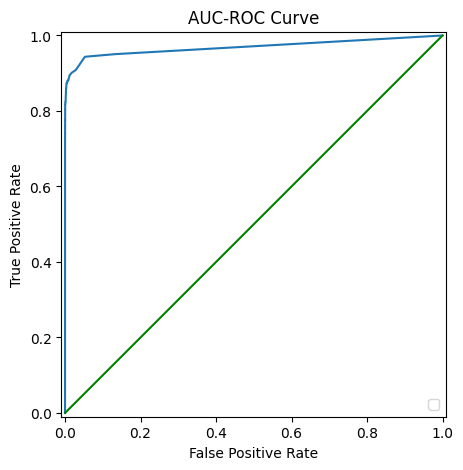

In [49]:
y_proba = smote_pipeline.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    #title
    plt.title('AUC-ROC Curve')
    #labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

AUC-ROC curve indicates that the model is likeyly a strong classifier with excellent potential for distinguishing between two classes(Honesty/not fraud).

#### 8.6 Precision-Recall Curve (PR curve)


The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.



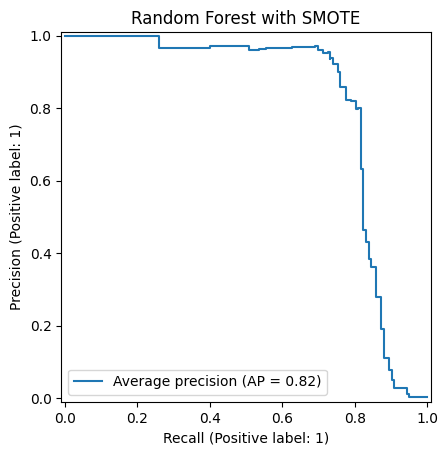

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    smote_pipeline, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with SMOTE")

We can clearly see the point where we have to start trading a lot of Precision for better Recall score!

Average precision (AP) summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold.

## 9. Save the Model Using Pickle

In [51]:
import pickle


# Save the trained model as a .pkl file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(smote_pipeline, file)

print("Model saved successfully!")


Model saved successfully!


In [75]:
# Save the scaler as a .pkl file
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model saved successfully!")

Model saved successfully!


Download the Model to Your Local Machine

In [76]:
from google.colab import files
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>